In [3]:
import os
import sys
import platform
import subprocess

venv_path = "venv" # Name of the virtual environment

if os.path.exists(venv_path): # Check if the Virtual Environment exists
    print("venv exists")
else:
    print("venv does not exist, creating it...")
    subprocess.run([sys.executable, "-m", "venv", venv_path]) # Creates venv for in the current script location

# Detect OS
system = platform.system()

# Path to Python interpreter inside venv
if system == "Windows":
    python_bin = os.path.join(venv_path, "Scripts", "python.exe") # Python Interpreter location, for windows
else:
    python_bin = os.path.join(venv_path, "bin", "python") # Python Interpreter on linux

# Show Python version
subprocess.run([python_bin, "--version"])

# Install packages using the venv's Python
subprocess.run([python_bin, "-m", "pip", "install", "-r", "requirements.txt"])

venv exists
Python 3.13.5
  Using cached torchvision-0.22.1-cp313-cp313-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached scikit_learn-1.7.0-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (17 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-2.3.1-cp313-cp313-manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.3.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)


ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11; 1.26.0 Requires-Python <3.13,>=3.9; 1.26.1 Requires-Python <3.13,>=3.9
ERROR: Could not find a version that satisfies the requirement platform (from versions: none)
ERROR: No matching distribution found for platform


CompletedProcess(args=['venv/bin/python', '-m', 'pip', 'install', '-r', 'requirements.txt'], returncode=1)

# Neural Networks - A recap


### Context


- What are Neurons here?
    - Models of neurons in our brain
    - Consists of nodes of computations that are connected to other nodes

### Perceptrons  
Perceptrons are simple units that when exposed to input, outputs one or zero. The threshold is something you can choose.

$$
\text{output} = 
\begin{cases} 
0 & \text{if } \sum_{j} w_{j} x_{j} + b \leq 0, \\
1 & \text{if }\sum_{j} w_{j} x_{j} + b > 0
\end{cases}
$$

Here, $w$ is weight of the connection, i.e. importance of the connections. And corresponding $x$ is the input. and b is the bias term.

<div style="text-align:center">
    <img src="Perceptron.png" alt="Perceptron Diagram" style="width:400px">
</div>

In [ ]:
import numpy as np                  ##? A Library for fast linear algebra
import matplotlib.pyplot as plt     ##? A standard ploting library, for quick ploting. For publication quality plots use plotly.

In [ ]:
 #* Perceptron In code. 
def perceptron_np(input: np.ndarray, weights: np.ndarray, bias: float):
    sum = np.array(())
    for j in range(len(input)):                     #? Loop through all the elements of the array
        sum_j = (input[j] * weights[j])             #? Calculates the sum of j-th element
        sum = np.append(sum, sum_j)                 #? Append the sum_j to the sum array
    sum = np.sum(sum)                               #? Sum all the elements in sum array    
    activation = 0 if sum + bias <= 0 else 1        #? condition for activation to be 1 or 0
    return activation

In [ ]:
 #* Perceptron In code. More optimized
def perceptron_opt(input: np.ndarray, weights: np.ndarray, bias: float):
    """
    A simple perceptron neurons
    Arguments:
        signal: A numpy array of input signal for perceptron.
        weights: weights for corresponding input signal
        bias: threshold for the perceptron
    Returns:
        activation of perceptron, integer - 0 or 1
    """
    activation = np.sum(np.multiply(input, weights)) + bias     #? multiply does the same thing as (signal * weights) np.multiply makes it more readable. For matrix multiplication -> np.matmul(a,b)
    return int(activation > 0)                                  #? output > 0 returns True if the statement is true and False otherwise, int convert it to 1 or 0 for True and False otherwise.

In [ ]:
signal = np.random.random(3)    #? Generates a random array of length 3 between range [0, 1)
signal = signal *2 -1           #? Push the range to [-1, 1)
weights = np.random.random(3)
weights = weights *2 -1
bias = 0.6

print(f"Weights: {weights}\nSignal: {signal}\nBias: {bias}\n")
print(f"Activation from perceptron_np: {perceptron_np(signal, weights, bias)}")
print(f"Activation from perceptron_opt: {perceptron_opt(signal, weights, bias)}")

Weights: [-0.4876372  -0.38097705 -0.90736864]
Signal: [0.26969615 0.13562149 0.29210656]
Bias: 0.6

Activation from perceptron_np: 1
Activation from perceptron_opt: 1


#### Mini Exercise
- Write perceptron with pytorch tensors.
- remember type hinting and Commenting

In [ ]:
 #! Your solution
def perceptron_torch():
    pass

A perceptron is a neuron with step function as activation.
Formally, Heaviside Step function is
$$
\mathbf{H} = 
\begin{cases} 
0 & \text{if } \mathbf{Z_{j}} \leq 0, \\
1 & \text{if } \mathbf{Z_{j}} > 0
\end{cases}
$$

- $\mathbf{Z}$ is weighted input for the neurons, for us $\mathbf{Z(x)} = w_{j}x_{j} + b$

In [ ]:
def step(x):
    return np.where(x >= 0, 1, 0)

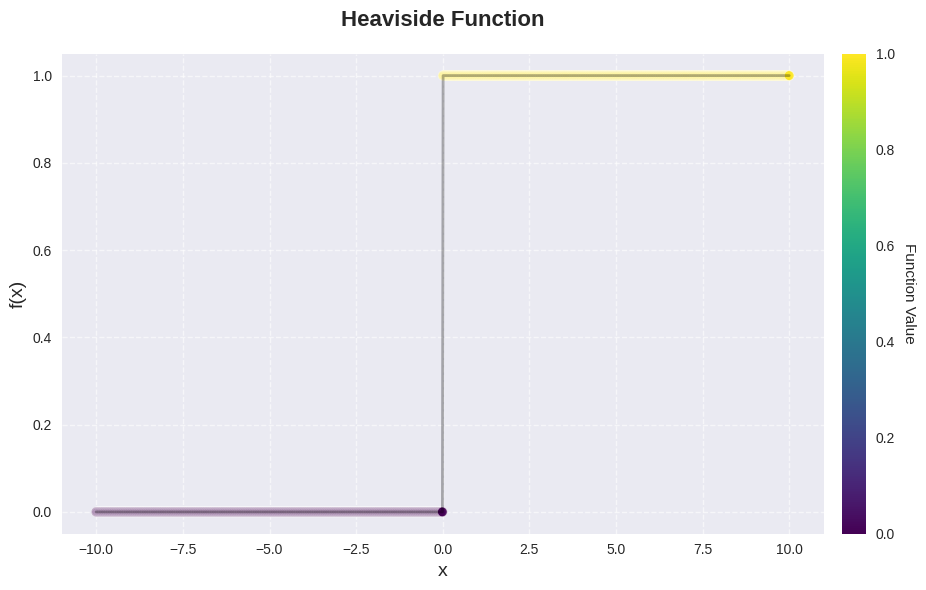

In [ ]:
from helper_functions import plot_functions #? plot_functions plots callable functions. compatible with torch.Tensors and np.ndarray. Can handle raw np.ndarrays and tensors as well.

plt.show(plot_functions(step, title="Heaviside Function"))

Perceptrons are useful. For example in ref.2 they have used linked perceptrons to generate gates (NAND, AND, NOR and so on). 
But they can be limiting because they are not continuous and hance not differentiable. 
There are many possible activation functions that one can use. They are generally task dependent.

### Sigmoid Neurons

Sigmoid neurons are activated by sigmoid function,

$$
\sigma(Z) = \frac{1}{1 + e^{-Z}}
$$

writing everything explicitly for completeness,


$$
\sigma(x) = \frac{1}{1 + \exp\left(-\sum_{j} w_{j}x_{j} + b\right)}
$$

Where:
- $x_j$ are the input signal
- $w_j$ are the weights
- $b$ is the bias term
- $\sum_{j} w_{j}x_{j} + b$ is the weighted sum $\mathbf{Z}$



/tmp/ipykernel_24701/597609864.py:9: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return 1 / (1 + np.exp(-Z))


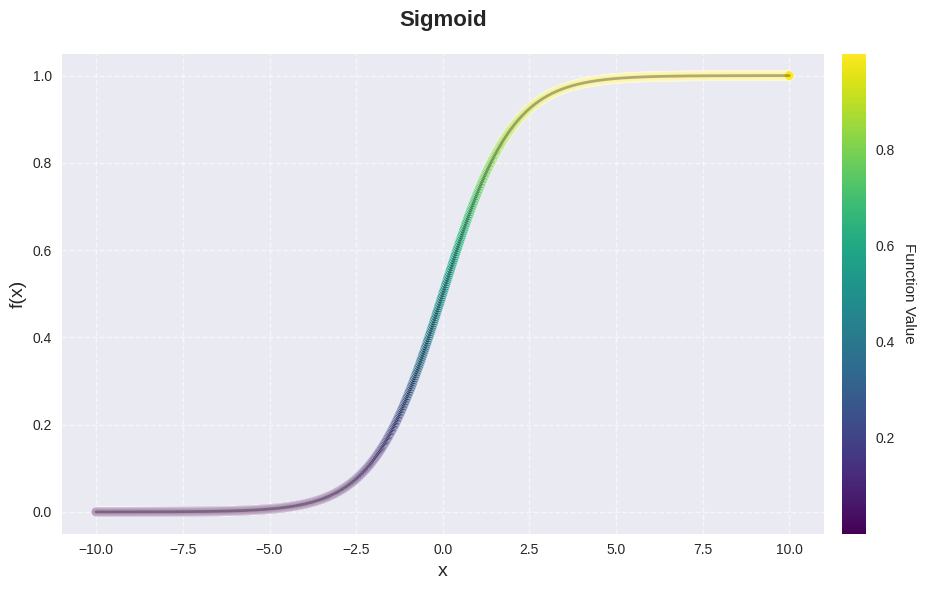

In [ ]:
def sigmoid(Z):
    """
    Returns the activation from the weighted input
    Arguments:
        Z : weighted input
    Returns:
        activation of the neuron
    """
    return 1 / (1 + np.exp(-Z))

ax = plot_functions(sigmoid, title="Sigmoid")
plt.show(ax)

Sigmoids are good not only because they are differentiable but they also give us the advantage of tweaking the $\mathbf{Z}$ slightly to have output change slightly, not dramatically like heaviside step function

#### Mini Exercise
- Generate a weighted input from the input

In [ ]:
 #! Your Code
def weighted_input(input):
    pass

### Other Activations
| Function      | Definition                                      | Range       | Differentiable? | Common Uses         |
|--------------|------------------------------------------------|-------------|-----------------|---------------------|
| **ReLU**     | $\max(0, x)$                                   | $[0, ∞)$    | Yes* (at x≠0)   | Hidden layers       |
| **Leaky ReLU** | $\begin{cases} x & x \geq 0 \\ 0.01x & x < 0 \end{cases}$ | $(-∞, ∞)$ | Yes* (at x≠0)   | Fixes "dying ReLU"  |
| **Tanh**     | $\frac{e^x - e^{-x}}{e^x + e^{-x}}$            | $(-1, 1)$   | Yes             | RNNs/Hidden layers |
| **Softmax**  | $\frac{e^{x_i}}{\sum e^{x_j}}$                | $(0, 1)$    | Yes             | Output layers       |

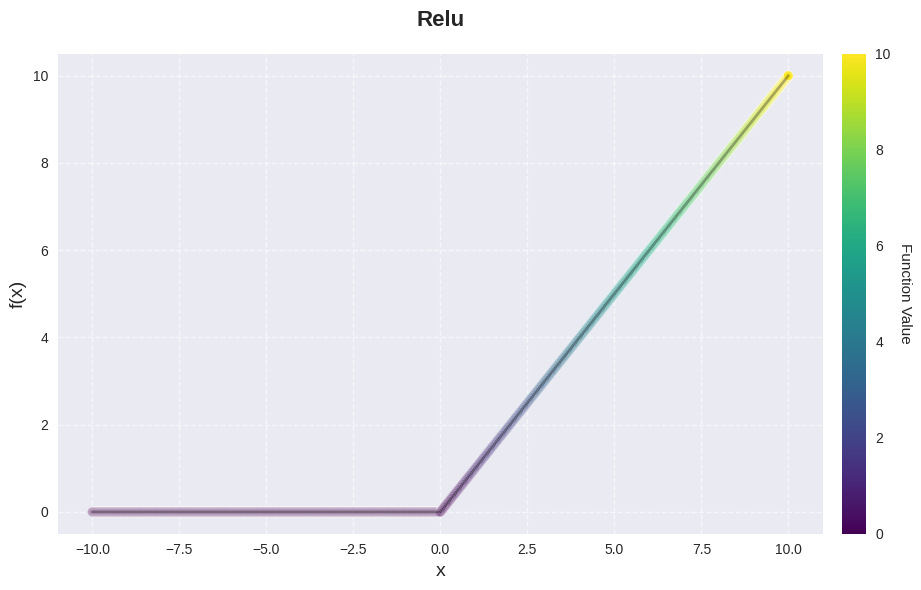

In [ ]:
import torch
from torch.nn import functional 

plt.show(plot_functions(functional.relu , title= "Relu"))     #? Change the name here to see the plot of the desired function. Softmax will not work.

## Architecture of Neural Network

Now that we have neurons, units that can compute output with the input after some transformation We move on to the network part.
For complex tasks we would need more than one neuron. In a fashion where one's output is feed into the input of the next, and so on. A general Schamatic is:


<div style="text-align:center">
    <img src="NeuralNetwork.png" alt="Perceptron Diagram" style="width:500px">
</div>

This is fully connected Feed Forward architecture.

In [ ]:
# Network in code
def feedforward_network(input_vector, weights_hidden, bias_hidden, weights_output, bias_output):
    # Input to hidden layer
    hidden_input = np.dot(weights_hidden, input_vector) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    # Hidden to output layer
    output_input = np.dot(weights_output, hidden_output) + bias_output
    output = sigmoid(output_input)

    return output

# Example parameters
np.random.seed(42)  # for reproducible results

# 3 inputs, 5 hidden neurons
weights_hidden = np.random.randn(5, 3)
bias_hidden = np.random.randn(5)

# 5 hidden neurons, 2 output neurons
weights_output = np.random.randn(2, 5)
bias_output = np.random.randn(2)

# Example input vector (3 features)
input_vector = np.array([0.7, 0.2, 0.9])

# Forward pass
output = feedforward_network(input_vector, weights_hidden, bias_hidden, weights_output, bias_output)
print("Output of the network:", output)

Output of the network: [0.45284604 0.82010336]


In [ ]:
#NOTE: incoming shape must be compilable with the matrix multiplication. Out features should be same as in features of the next layer.

print(f"Output Weights: {weights_output.shape}\nHidden Weights: {weights_hidden.shape}\nInput Vector: {input_vector.shape}")

Output Weights: (2, 5)
Hidden Weights: (5, 3)
Input Vector: (3,)


# References

1. **3Blue1Brown** - First 4 videos for intuitive understanding - https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&si=_R5V5O0lDB153wcA
2. **Book** - Neural Networks and Deep Learning by Michael Nielsen - http://neuralnetworksanddeeplearning.com/